# On wrapping angles
this will be a seminar dedicated to the problem of wrapping angles, when it is necessary to do it and when not.

Any angle can be represented by a real value $\alpha \in \mathbb{R}$.

However, we know that by this definition, multiple values represent the same angle since $\alpha = \alpha +2\pi\cdot k$. This property of the representation (surjective) of many values mapping to the same angle is not a problem, since this angle is unique.

Now we will investigate different effects on the angles, applied to state estimation problems.

## Task 1: Open loop propagation
Given the system $x_t = x_{t-1}+u_t + \eta_t$, propagate for the sequence $u_t = 0.3$ for $t=1,\dots,100$. 

$\eta_t\sim\mathcal{N}(0,0.1)$ and $x_0\sim\mathcal{N}(0,0)$ (perfect information)

You can use the *wrap* function from PS2 (copied here below)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def wrap_angle(angle):
    """
    Wraps the given angle to the range [-pi, +pi].

    :param angle: The angle (in rad) to wrap (can be unbounded).
    :return: The wrapped angle (guaranteed to in [-pi, +pi]).
    """

    pi2 = 2 * np.pi

    while angle < -np.pi:
        angle += pi2

    while angle >= np.pi:
        angle -= pi2

    return angle


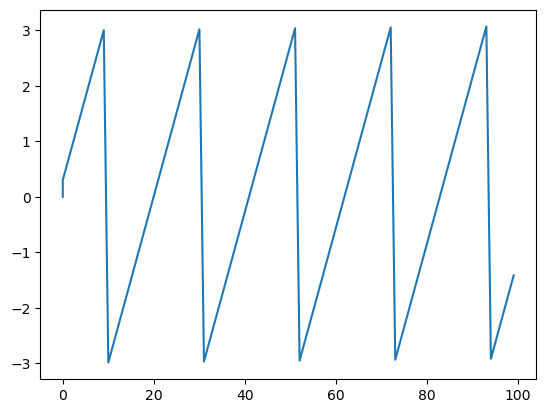

In [28]:
N = 100
x = [0]
x_gt= [0]
R = 0.01
u=np.random.randn(N)*np.sqrt(R)+0.3
time = [0]
for t in range(N):
    time.append(t)
    x_gt.append(wrap_angle(x_gt[-1]+0.3)) #this will be used later for comparison
    
    # TODO code for mean propagation
    
plt.plot(time,x_gt,x)
plt.show()

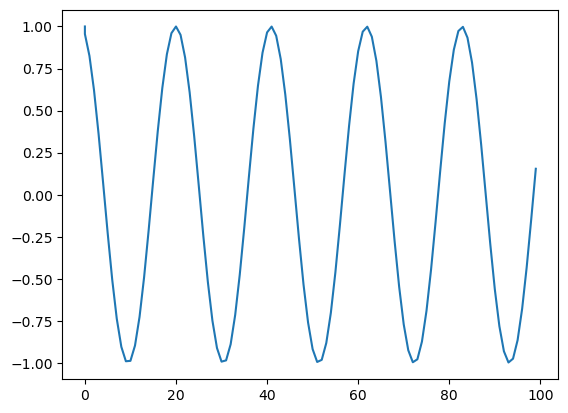

In [29]:
plt.plot(time,np.cos(x_gt), np.cos(x))
plt.show()

## Task 2: Correction
we consider the observation model $p(z_t | x_t)$ and the observation function $z_t = h(x_t)+\delta_t = x_t+\delta_t, \quad \delta\sim \mathcal{N}(0,Q)$, for $Q=1$


The overeall probabilistic observation model taking intou account both random varaibles is
$z_t \sim \mathcal{N}(z_t | h(x_t), H\Sigma_xH^T+Q)$, as explained in L05

In [30]:
Q = 0.01
z = x_gt[1:] + np.random.randn(N)*np.sqrt(Q)

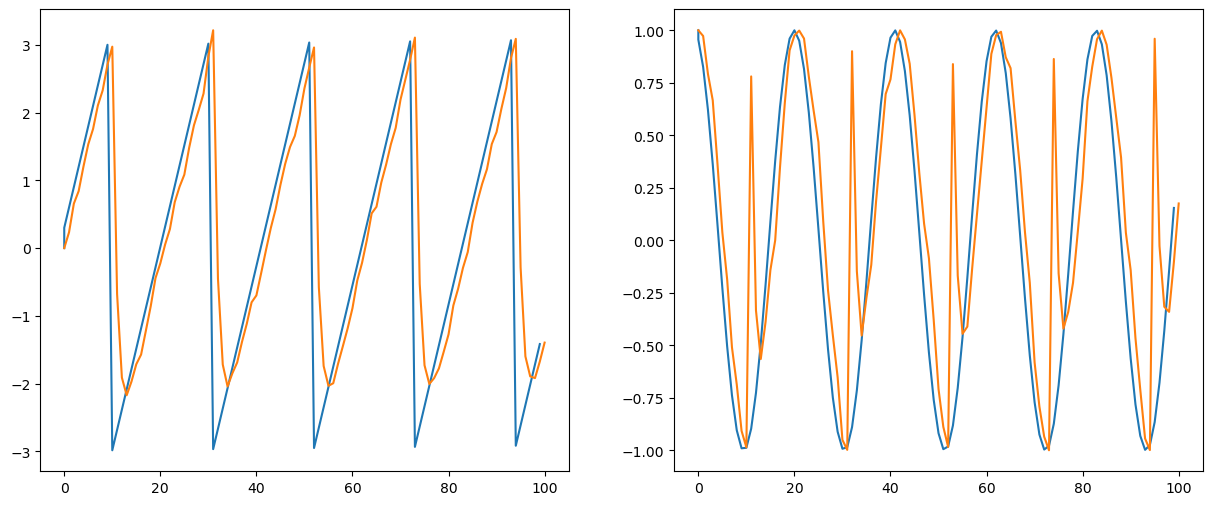

In [31]:
xp = [0]
cov = [0]
for t in range(N):
    xp.append((xp[-1]+u[t]))
    cov.append(cov[-1]+R)
    k = cov[-1] / (cov[-1] + Q)
    xp[-1] = xp[-1] + k *(z[t] - xp[-1])
    cov[-1] = (1 - k) * cov[-1]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(time,x_gt,xp)
plt.subplot(1,2,2)
plt.plot(time,np.cos(x_gt), np.cos(xp))
plt.show()

Q: Where it is necessary to wrap angles?

Q: Explain why?

Q: What is the minumum number of warping necessary?